# Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### PSEUDOCODE:
1. Import necessary libraries
    * `numpy`, `matplotlib.pyplot`, `ipywidgets`, `scipy.integrate.solve_ivp`, `scipy.interpolate.interp1d`, `scipy.optimize.minimize`
2. Define function for potential energy: `potential_energy`
    * INPUTS: $Q, K, D, \Phi$
    * OUPUTS: $U(Q)$
    * TESTS: Plot to make sure it looks like expected (with the anharmonic fourth-order term), plug in values we know the answer to (e.g. $Q = 0$)
3. Solve equations of motion for harmonic case
    * $\Delta U = \frac12KQ^2 - \frac14DQ^4 + \frac16\Phi Q^6$
    * $-\frac{dU}{dQ} = F = M\ddot Q = KQ - DQ^3 + \Phi Q^5$
    * Get guess for equations (oscillatory — will be sin and cos)
    * Find constants using initial conditions
    * Find $\omega_0$ from equation for $\omega$ with $Q = 0$
4. Define function for harmonic equations of motion: `eqs_motion_harmonic`
    * INPUTS: $K, D, \Phi, M, Q_0, V_0, t$
    * OUTPUTS: $Q$
5. Define anharmonic system of equations: `anharmonic_oscillator`
    * INPUT: $K, D, \Phi, M, Q_0, V_0, t$
    * OUTPUT: $\dot Q, \ddot Q$
6. Solve anharmonic with RK45 solver
    * INPUTS: `anharmonic_oscillator`, time mesh, $Q_0, V_0, K, D, \Phi, M$
    * OUTPUTS: $Q$ on the given time mesh
    * TESTS: Plug in initial conditions to confirm behavior is as expected, plot to see if it lines up with harmonic case at small $Q_0$
8. Plot $Q(t)$ vs $t$ with adjustable $Q_0$ values
    * INPUT: $Q_0, t_{max}, K, D, \Phi, M, Q_0, V_0$
    * OUTPUTS: $Q$ vs $t$
9. Extract approximate $\tau$ values for each $Q_0$ to get a guess for the minimum finder
    * Adjust $Q_0$ and eyeball points where the anharmonic period is twice/thrice/etc. the harmonic one. Can measure fractional periods for the in-between points
    * OUTPUTS: table of $Q_0$ vs $\tau$ values
    * TEST: Create a marker on the $Q$ vs $t$ graph that shows the experimentally determined $\tau$ to see if it lines up with the period of the anharmonic curve
10. Convert to angular frequency $\omega$
    * Minimum finder will give half of period, double for full period
    * Convert to frequency by $\omega = \frac{2\pi}{\tau}$
    * Interpolate with `interp1d` to get the in-between values
    * OUTPUTS: $\omega$ interpolated for a specific range of $Q_0$
    * TESTS: would be wonderful to test it if I could get it to execute without having an error :/ I think I know what's wrong with it but I do not have time to fix it
    * TESTS: Look at values to make sure that it lines up with what would be expected (lower frequency when $Q$ can be in all three wells, higher frequency near bottom of the wells), plug in $Q_0 = 0$ to make sure $\omega_0$ is the right value
11. Use approximated $\omega$ values to create plot from $\omega$ vs $Q_0$
    * INPUTS: $K, D, \Phi, M, V_0,$ `frequency_interp`
    * OUTPUTS: $\omega$ vs $Q_0$
    * TESTS: Put vertical lines where $\omega$ should abruptly change (extrema on $U(Q)$) to see if the graph does as expected

### Equations of Motion:

$\Delta U = \frac12KQ^2 - \frac14DQ^4 + \frac16\Phi Q^6$

---

$Q(t) = Acos(\omega t) + Bsin(\omega t)$

$\dot Q(t) = -A\omega sin(\omega t) + B\omega cos(\omega t)$

$\ddot Q(t) = -A\omega^2cos(\omega t) - B\omega^2 sin(\omega t)$

---

$Q(0) = Q_0 = Acos(0) + Bsin(0) \rightarrow A = Q_0$

$\dot Q(0) = V_0 = -A\omega_0sin(0) + B\omega_0cos(0) \rightarrow B = \frac{V_0}{\omega_0}$

---

$\omega = \sqrt{\frac{1}{M}\frac{d^2U}{dQ^2}} \rightarrow \omega = \sqrt{\frac{1}{M}(K - 3DQ^2 + 5\Phi Q^4)} \rightarrow \omega_0 = \sqrt{\frac{K}{M}}$

---

$Q(t) = Q_0cos(\omega t) + \frac{V_0}{\omega_0}sin(\omega t)$

---

$\omega = \sqrt{\frac{1}{M}(K - 3DQ^2 +5\Phi Q^4)}$

Small angle approximation: $(1 + \epsilon)^\frac12 = 1 + \epsilon + ...$

$\omega = \sqrt{\frac{K}{M}}\sqrt{1 - \frac{3D}{K}Q^2 + \frac{5\Phi}{K}Q^4} \approx \sqrt{\frac{K}{M}}(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)$

$\omega = \omega_0(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)$

#### To use RK45 Solver:

Define first-order system of differential equations:

$\dot Q = V$

$\dot V = -\frac{K}{M}Q + \frac{D}{M}Q^3 - \frac{\Phi}{M}Q^5$

In [33]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import minimize

In [23]:
# define constants
V0  = 0
K   = 1.0
D   = 2.4
Phi = 1.0
M   = 1.0

In [34]:
# functions to describe potential energy and oscillatory motion
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    '''
    Defines the potential energy U(Q) for an anharmonic oscillator.

    Q: The independent variable.
    K, D, Phi: Constants.
    '''
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

#omega = omega0 for harmonic case
def eqs_motion_harmonic(t_vals, Q0 = 0.1, V0 = 0.0, K=1.0, D=2.4, Phi=1.0, M = 1.0):
    '''
    Defines the equation of motion Q(t) for a simple harmonic oscillator.

    t_vals: A mesh of time values for the function to be evaluated on.
    Q0, V0: Initial conditions for position (Q) and velocity (V).
    K, D, Phi, M: Constants for the problem.
    '''
    omega0 = np.sqrt(K/M)
    return Q0*np.cos(omega0*t_vals) + V0/omega0*np.sin(omega0*t_vals)

def anharmonic_oscillator(t_vals, y, K=1.0, D=2.4, Phi=1.0, M = 1.0):
    '''
    A system of differential equations for anharmonic motion, to be solved.

    t_vals: A mesh of time values for the function to be defined on.
    y: An array of two values, Q (position) and V (velocity).
    K, D, Phi, M: Constants for the problem.
    '''
    Q, V = y
    dQdt = V
    dVdt = -(K/M*Q) + (D/M*Q**3) - (Phi/M*Q**5)
    return [dQdt, dVdt]

# solve anharmonic eqs of motion with RK45
def get_anharmonic_sol(y0, t_max, K=1.0, D=2.4, Phi=1.0, M = 1.0):
    '''
    Solves the anharmonic system of equations for this problem.

    y0: Initial conditions. Array of two values, Q0 and V0.
    t_max: The length of time for this function to be evaluated on.
    K, D, Phi, M: Constants for the anharmonic potential.
    '''
    sol = solve_ivp(anharmonic_oscillator,
                    [0, t_max],
                    y0,
                    t_eval=np.linspace(0, t_max, 500),
                    args=(K, D, Phi, M))
    return sol.y[0]

In [51]:
# plotting functions

def Q_vs_t(Q0, t_max=25):

    y0 = Q0, V0
    Q_vals_anharmonic = get_anharmonic_sol(y0, t_max)

    # define mesh for plotting
    t_vals = np.linspace(0,t_max,500)
    Q_vals_harmonic = eqs_motion_harmonic(t_vals, Q0)

    # construct plot
    plt.figure(figsize=(12, 4))
    plt.plot(t_vals, Q_vals_harmonic, color="teal", label="Harmonic Oscillator")
    plt.plot(t_vals, Q_vals_anharmonic, color="red", label="Anharmonic Oscillator")
    plt.title("$Q(t)$ vs time with changeable $Q_0$")
    plt.xlabel("$t$")
    plt.ylabel("$Q(t)$")
    plt.xlim(0,t_max)
    plt.ylim(-1.8,1.8)
    plt.axhline(linewidth='0.4', color='grey')
    # plt.axvline(x = period_interp(Q0), linewidth='0.4', color='grey')
    plt.legend()
    plt.show()

def test_interpolation(period_interp, Q0_by_hand, period_by_hand, x_min=-1.9, x_max=1.9, y_min=0.0, y_max=6.0):
    Q0_mesh = np.linspace(-1.7,1.7,36)
    period_interp_mesh = period_interp(Q0_mesh)
    
    plt.figure(figsize=(7,5))
    plt.plot(Q0_by_hand, period_by_hand, label="guess at period", color="green", linewidth=1.0, marker='.', linestyle='-')
    plt.plot(Q0_mesh, period_interp_mesh, label="period interpolation", color="red", linewidth=1.0, linestyle='-')
    plt.xlabel('Initial $Q$')
    plt.ylabel('Period')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.axvline(x = 0, linewidth='0.4', color='black')
    # references for where the length of period changes abruptly
    plt.axvline(x = -0.732581, linewidth='0.4', color='grey')
    plt.axvline(x =  0.732581, linewidth='0.4', color='grey')
    plt.axvline(x = -1.587, linewidth='0.4', color='grey')
    plt.axvline(x =  1.587, linewidth='0.4', color='grey')
    plt.legend()
    plt.show()

def frequency_vs_Q0(frequency_interp, Qpm=0.732581, Qe=1.587, x_min=-1.8, x_max=1.8, y_min=0.0, y_max=15.0):
    # define mesh for plotting
    Q0_vals = np.linspace(-1.7,1.7,500)
    frequency_mesh = frequency_interp(Q0_vals)
    
    # construct figure
    plt.figure(figsize=(12, 4))
    plt.plot(Q0_vals, frequency_mesh, color="darkslateblue")
    plt.title("$\omega$ vs $Q_0$ by hand")
    plt.xlabel("$Q_0$")
    plt.ylabel("$\omega$")
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.axvline(x = 0, linewidth='0.4', color='grey')
    # points where period changes abruptly
    plt.axvline(x = -Qpm, linewidth='0.3', color='grey')
    plt.axvline(x =  -Qe, linewidth='0.3', color='grey')
    plt.axvline(x =  Qpm, linewidth='0.3', color='grey')
    plt.axvline(x =   Qe, linewidth='0.3', color='grey')
    # plt.legend()
    plt.show()

In [52]:
# Plot of Q(t) vs t
widgets.interact(Q_vs_t,
                 Q0    = widgets.FloatSlider(min=0, max=1.75, step=0.005, value=0.6, description='$Q_0$', readout_format = '.3f'),
                 t_max = widgets.FloatSlider(min=0.0,  max=200,  step=1.0, value=25.0, description='Max Time')
                )

interactive(children=(FloatSlider(value=0.6, description='$Q_0$', max=1.75, readout_format='.3f', step=0.005),…

<function __main__.Q_vs_t(Q0, t_max=25)>

**"Experimental" Initial amplitude $Q_0$ vs period $\tau$**, setting the period of the harmonic case equal to 1 ($\tau_0 = 1$):

| $Q_0$   | $\tau$          | Rounded  | | | $Q_0$   | $\tau$          | Rounded  |
|---------|-----------------|----------|-|-|---------|-----------------|----------|
| $0.000$ | $1$             | $1.0000$ | | | $0.785$ | $\frac{27}{8}$  | $3.3750$ |
| $0.130$ | $\frac{72}{71}$ | $1.0141$ | | | $0.795$ | $\frac{29}{12}$ | $2.2308$ |
| $0.180$ | $\frac{37}{36}$ | $1.0277$ | | | $0.815$ | $\frac{13}{12}$ | $1.0833$ |
| $0.220$ | $\frac{23}{22}$ | $1.0455$ | | | $0.930$ | $\frac{4}{6}$   | $0.6666$ |
| $0.280$ | $\frac{14}{13}$ | $1.0769$ | | | $0.990$ | $\frac{6}{10}$  | $0.6000$ |
| $0.330$ | $\frac{10}{9}$  | $1.1111$ | | | $1.065$ | $\frac{5}{9}$   | $0.5556$ |
| $0.370$ | $\frac{8}{7}$   | $1.1429$ | | | $1.135$ | $\frac{22}{43}$ | $0.5116$ |
| $0.410$ | $\frac{13}{11}$ | $1.1818$ | | | $1.260$ | $\frac{6}{13}$  | $0.4615$ |
| $0.460$ | $\frac{5}{4}$   | $1.2500$ | | | $1.315$ | $\frac{14}{31}$ | $0.4516$ |
| $0.490$ | $\frac{14}{11}$ | $1.2727$ | | | $1.420$ | $\frac{5}{11}$  | $0.4545$ |
| $0.510$ | $\frac{4}{3}$   | $1.3333$ | | | $1.480$ | $\frac{10}{21}$ | $0.4762$ |
| $0.560$ | $\frac{10}{7}$  | $1.4286$ | | | $1.565$ | $\frac{8}{13}$  | $0.6154$ |
| $0.600$ | $\frac{11}{7}$  | $1.5714$ | | | $1.585$ | $\frac{7}{9}$   | $0.7777$ |
| $0.670$ | $2$             | $2.0000$ | | | $1.590$ | $\frac{27}{7}$  | $3.8571$ |
| $0.710$ | $\frac{13}{5}$  | $2.6000$ | | | $1.610$ | $\frac{29}{13}$ | $2.2308$ |
| $0.735$ | $5$             | $5.0000$ | | | $1.640$ | $\frac{12}{7}$  | $1.7143$ |
| $0.755$ | $\frac{41}{13}$ | $3.1538$ | | | $1.675$ | $\frac{7}{5}$   | $1.4000$ |
| $0.780$ | $\frac{21}{6}$  | $3.5000$ | | | $1.705$ | $\frac{5}{4}$   | $1.2500$ |

The period becomes twice (?) as long when it reaches the $Q_0$ required to get out of the central potential well and into the wells on the sides, then later becomes shorter again as it gets stuck in the right well (and left, because it's symmetrical, but I only looked at positive $Q_0$ values)

In [48]:
# transfer experimental values from table to arrays
Q0_by_hand     = np.array([0.0000, 0.1300, 0.1800, 0.2200, 0.2800, 0.3300, 0.3700, 0.4100, 0.4600, 0.4900, 0.5100, 0.5600, 0.6000, 0.6700,
                           0.7100, 0.7350, 0.7550, 0.7800, 0.7850, 0.7950, 0.8150, 0.9300, 0.9900, 1.0650, 1.1350, 1.2600, 1.3150, 1.4200,
                           1.4800, 1.5650, 1.5850, 1.5900, 1.6100, 1.6400, 1.6750, 1.7050])
period_by_hand = np.array([1.0000, 1.0141, 1.0277, 1.0455, 1.0769, 1.1111, 1.1429, 1.1818, 1.2500, 1.2727, 1.3333, 1.4286, 1.5714, 2.0000,
                           2.6000, 5.0000, 3.1538, 3.5000, 3.3750, 2.2308, 1.0833, 0.6666, 0.6000, 0.5556, 0.5116, 0.4615, 0.4516, 0.4545,
                           0.4762, 0.6154, 0.7777, 3.8571, 2.2308, 1.7143, 1.4000, 1.2500])

# flip and mirror to get values for negative Q0
Q0_by_hand = np.concatenate((-np.flip(Q0_by_hand), Q0_by_hand))
period_by_hand = np.concatenate((np.flip(period_by_hand), period_by_hand))
period_interp = interp1d(Q0_by_hand, period_by_hand, kind='linear')

# turn into frequency values & interpolate bc the minimum finder isn't working so I'll just use this
frequency_by_hand = 2*np.pi / period_by_hand
frequency_interp = interp1d(Q0_by_hand, frequency_by_hand, kind='linear')

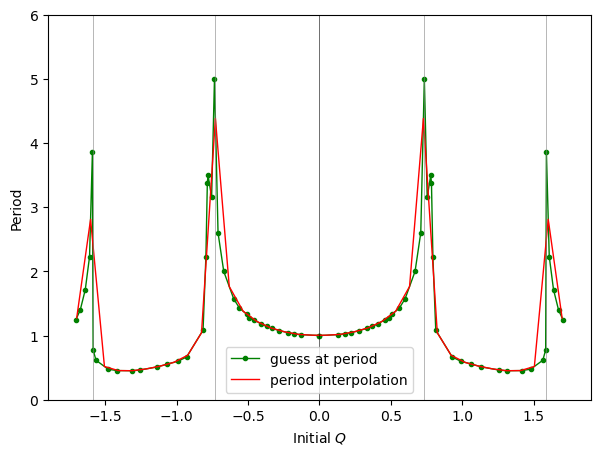

In [46]:
test_interpolation(period_interp, Q0_by_hand, period_by_hand)

#### PLAN:
1. **Find equilbrium points so I can apply the minimum finder correctly, to get $\tau$**
* Call $Q$ at the maxima (the point between the central well and the side well) $Q_\pm$. Call the $Q$ value with the same potential energy $Q_e$ (bc it's on the edge)... $U(Q_\pm) = U(Q_e)$
* Look for points near $\pm 0.7$ where $U'(Q) = 0$
* Get $U'(Q) = KQ - DQ^3 + \Phi Q^6$ and solve for when $U'(Q) = 0$
* Extract $Q_\pm$ and verify it's the right value by comparing with experimental data
* Find $U(Q_\pm)$ by plugging $Q_\pm$ into $U(Q)$. Solve for $U(Q) = U(Q_\pm)$ to find $Q_e$
2. **Apply minimum finder**
* Use different schema for $Q \in (0, Q_\pm), Q \in (Q_\pm, Q_e),$ and $Q \in (Q_e, 1.7)$
* Separate $\tau$ interpolation and its accompanying $Q_0$ array into three different arrays, one for each scheme
* Apply minimum finder to the anharmonic oscillator mesh `Q_vals_anharmonic` using the guess for period found above
* Extract numerically found $\tau$ and convert to angular frequency with $\omega = \frac{2\pi}{\tau}$
3. **Plot $\omega$ vs $Q_0$**
* Interpolate the numerical $\omega$ values and mirror them across the vertical axis
* Plot $\omega$ vs a mesh of $Q_0 \in (-1.7, 1.7)$

$\frac{dU}{dQ} = KQ - DQ^3 + \Phi Q^5 \rightarrow \frac{dU}{dQ} = 0$

Solutions:

$Q = \pm\frac{1}{\sqrt{2}}\cdot\sqrt{\frac{D \pm \sqrt{D^2 - 4K\Phi}}{\Phi}}$

$Q = \{-1.36503, -0.73258, 0, 0.73258, 1.36503\}$

Solution of interest is $0.73258$

---

$U(\pm0.73258) = \pm0.121288$

$U(Q_\pm) = U(Q_e) = 0.121288 = \frac12KQ^2 - \frac14DQ^4 + \frac16\Phi Q^6$

ok nvm the wolfram alpha solutions are like five sentences long let's do a different approach

---

From the data, the approach flips somewhere between $1.585$ and $1.590$, so maybe just say $\pm0.587$ as an estimate for $Q_e$

**Add analytical values for $\tau$ at $Q_\pm$ and $Q_e$ so the interpolation goes all the way to the edges**:

$\omega = \omega_0(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)$

$\tau = \frac{2\pi}{\omega} = \frac{2\pi}{\omega_0(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)}$

With $Q = Q_\pm: \tau = 4.4125$

With $Q = Q_e: \tau = 0.4309$

### Attempt to Use Minimum Finder (it did not work):

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# copy-pasted anharmonic oscillator solver, fix later
def anharmonic_oscillator(t_vals, y, K=1.0, D=2.4, Phi=1.0, M = 1.0):
    Q, V = y
    dQdt = V
    dVdt = -(K/M*Q) + (D/M*Q**3) - (Phi/M*Q**5)
    return [dQdt, dVdt]

# initial conditions
Q0 = 0.01 # (temporarily)
V0  = 0
K   = 1.0
D   = 2.4
Phi = 1.0
M   = 1.0
t_max = 100

y0 = Q0, V0
sol = solve_ivp(anharmonic_oscillator,
                [0, t_max],
                y0,
                t_eval=np.linspace(0, t_max, 500),
                args=(K, D, Phi, M))

# define mesh for plotting
Q_vals_anharmonic = sol.y[0]
Q0_vals = np.linspace(0,1.705,500)

Q_anharmonic_interp = interp1d(Q0_vals, Q_vals_anharmonic, kind='linear')

period_numerical = np.array([])

# okay this is not working and I do not have time to figure out why, I'm just gonna take the L and try and graph the guesses
# instead of the numerically solved versions and hope that's close enough to make a decent graph out of
'''
# Minimization (finding the local minimum)
for i in Q0_by_hand_1:
    print(Q_vals_anharmonic[j])
    period_numerical = np.append(period_numerical, minimize(Q_anharmonic_interp, period_interp_1.y(i)))
print(period_interp_1.y)
for i in Q0_by_hand_2:
    period_numerical = np.append(period_numerical, minimize(Q_vals_anharmonic, period_interp_2(i)).y)
# print(period_interp_2.x)
for i in Q0_by_hand_3:
    period_numerical = np.append(period_numerical, minimize(Q_vals_anharmonic, period_interp_3(i)).y)
'''

# print(period_numerical)
# print(period_interp_1.y)
# print()
# print(period_interp_2.y)
# print()
# print(period_interp_3.y)

'''
period_interp_all = period_interp_1.y
period_interp_all = np.append(period_interp_all, period_interp_2.y)
period_interp_all = np.append(period_interp_all, period_interp_3.y)

omega_vals = 2*np.pi/period_interp_all
'''

'\nperiod_interp_all = period_interp_1.y\nperiod_interp_all = np.append(period_interp_all, period_interp_2.y)\nperiod_interp_all = np.append(period_interp_all, period_interp_3.y)\n\nomega_vals = 2*np.pi/period_interp_all\n'

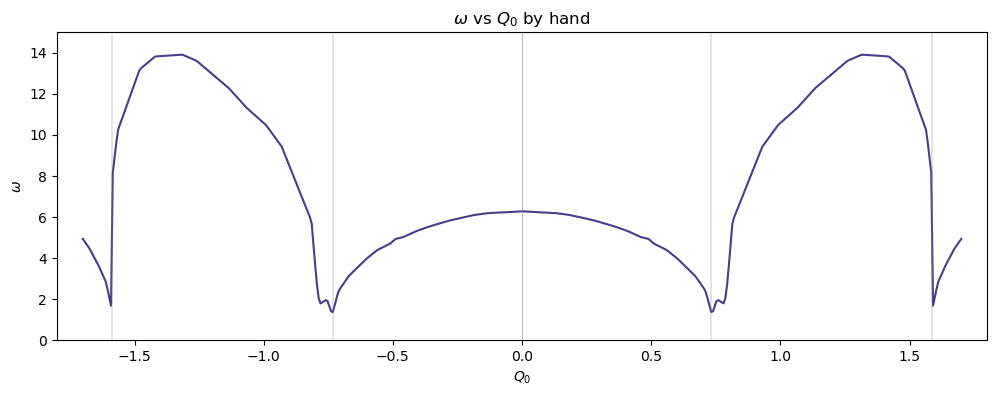

In [53]:
frequency_vs_Q0(frequency_interp)

The frequency is much higher when $Q_0$ starts in one of the off-center potential wells, reaching a peak the closer it gets to the minimum on the potential. Because this is experimental, it's not observed in the graph, but if it started exactly at the lowest value we wouldn't be able to define $\omega$ because it wouldn't have enough energy to move to either side. At the other extrema it would have the same problem

In the central well (approx. $Q_0 \in (-0.73, 0.73)$), the frequency decreases as it gets further from $Q_0 = 0$. This is because it takes longer to complete one cycle bc it has more energy to start, and thus is able to go further along the potential well for each oscillation.

The frequency quickly increases when $Q_0$ moves into the off-center potential well. Those wells have steeper sides, which allows the frequency to be much quicker than when starting in the central well, because it's a lot quicker to complete one cycle.

There's not as much data for the behavior at the edges ($Q_0 \approx 1.5–1.6$), but it appears that the frequency drops off pretty quickly as $Q_0$ gets closer to the outside edge of the potential well (which is steeper than the inside edge, so the asymmetry in the steepness of the above frequency graph makes sense); eventually $Q_0$ becomes large enough that it's able to travel through all three potential wells, which greatly decreases the frequency. I'm not sure how much I believe the part at the edge of the graph where it increases right as $Q_0$ approaches $1.7$, because the period should still be rather long at that point, and though it will increase in frequency as $U(Q_0)$ becomes larger, I don't think it seems very plausible for it to approach the same frequency as when $Q_0$ is close to zero that quickly.

This should be a lot smoother but I didn't have time to debug the minimize function, which would've given me values with a much lower error